<a href="https://colab.research.google.com/github/akeelrashid/Netflix_Movies_TV_Show_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Unsupervised_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **AKEEL RASHID**

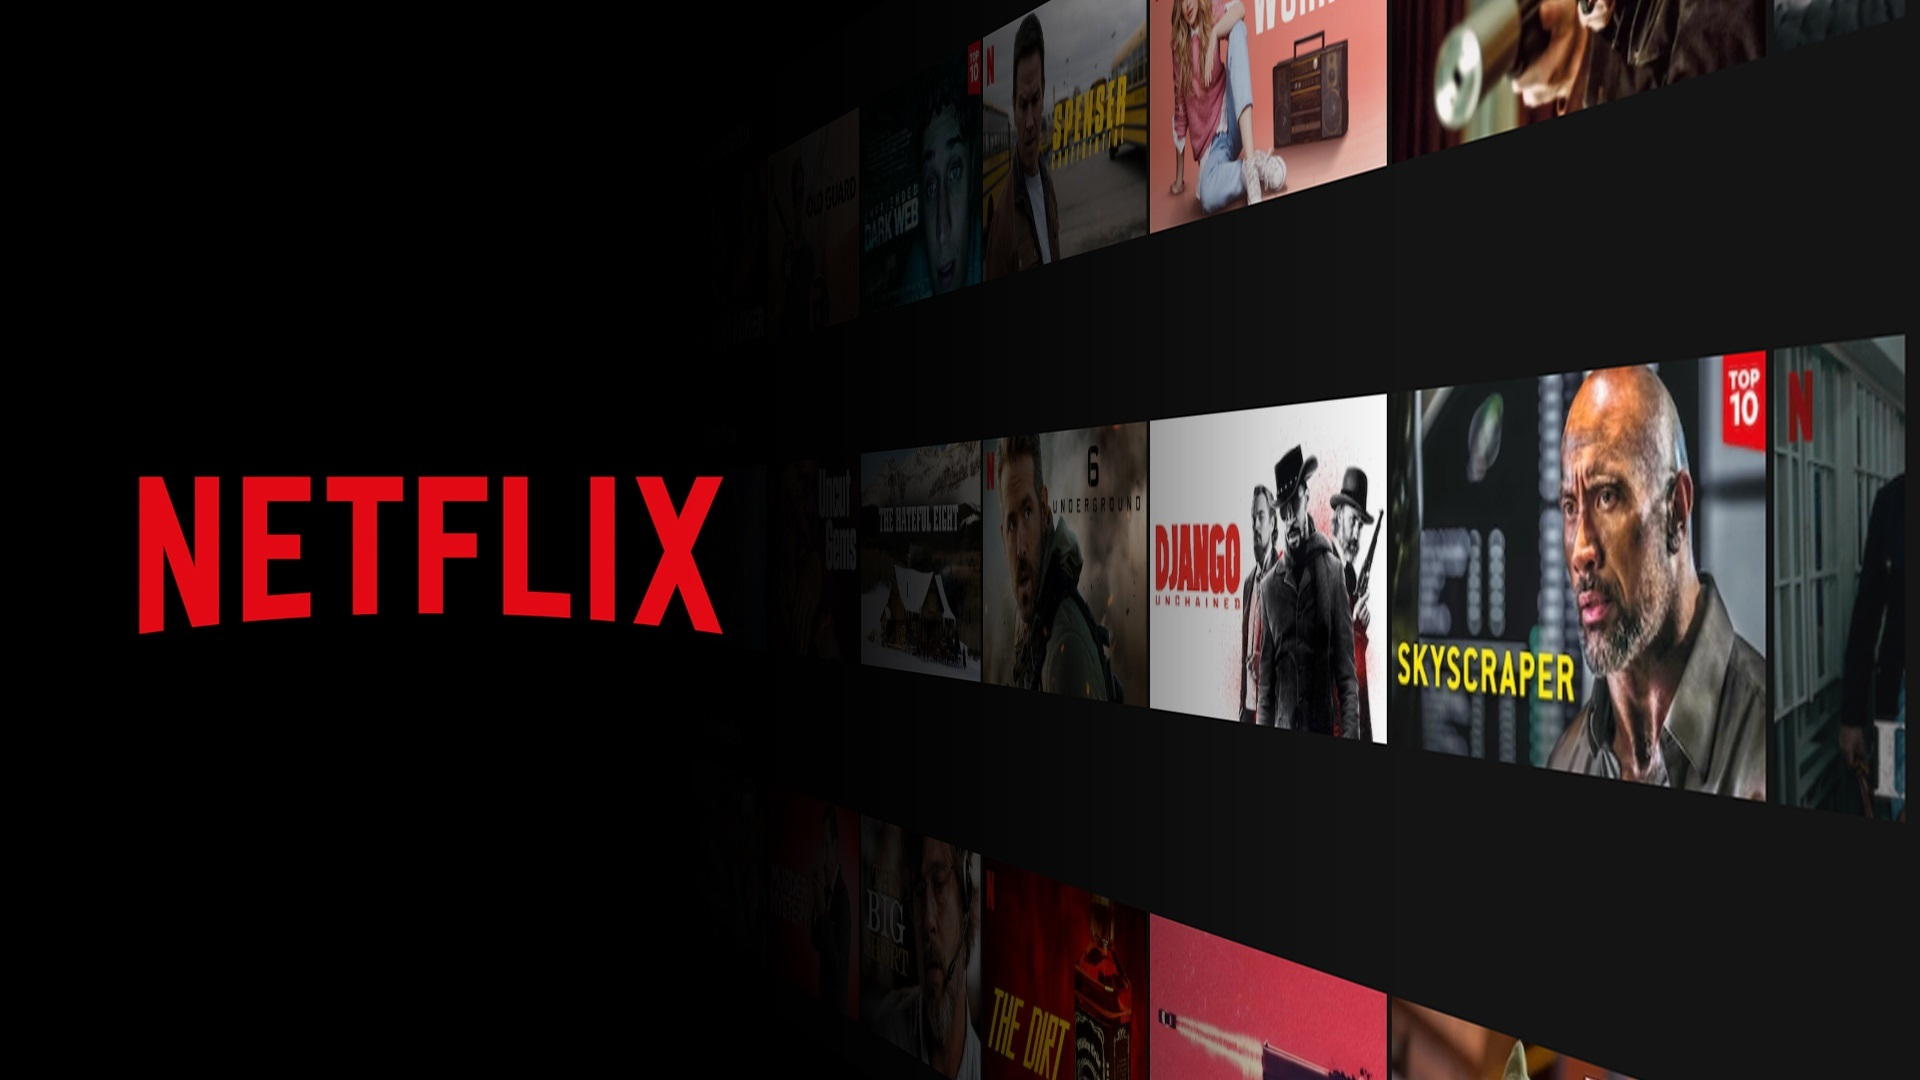

# **Project Summary -**

I have been given a dataset which consists of **Tv shows and Movies available on netflix** as of 2019 which was collected from Flixable which is a third party netflix search engine.My task is to **explore** the data in order to find some useful insights.Try to understand what type of **content** is available in **different countries** and has to develop a **Clustering model** based on matching text-based Feature.The dataset provides us information regarding type of content whether **Tv shows or Movies** that has been added on Netflix.It provides information like **Title,Director,cast** of the Tv show/Movie and **Country** where Movie/Tv show was produced.When was it added on Netflix,what is the **release date,duration,rating and Description** of Movie/Tv Show.

After importing the dataset in my colabnote book.it was find out that
the dataset consists of **7787** rows and **12** and the dataset **doesn't** contain any **duplicated** values but there are many features in dataset which **contains null** values like  **director** feature has maximum null vlaue around **30.68%**,followed by **cast 9.22%** ,**country 6.51%**,**date_added 0.13%** and **rating 0.09%**.I treated all the null values present in my dataframe,then i created some new column from the existing columns.

Then i performed **EDA** in order to find useful insights from the data and after that i performed **Textual Data Preprocessing** where i created new feature **filtered** using some important columns.Then i performed different method like **Lower casing**,**removed punctuations**,and **URLs**,**stops words**,**Lemmatization**,**Text Vectorization** and then performed Dimension reduction using **PCA**.

After that i implemented **K-Means** and **Hierarchical Agglomerative** clustering to cluster the dataset based on similarity with **Sihouette score** as evaluation metrics.At the end i have Built a **Recommendation system** that can help in providing Netflix users personalized recommendations based on their similarity scores.







# **GitHub Link -**

https://github.com/akeelrashid/Netflix_Movies_TV_Show_Clustering/blob/main/Unsupervised_Learning.ipynb

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project you require to do
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing all necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#Mount the drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
data=pd.read_csv('/content/drive/MyDrive/Netflix Movie And Tv shows Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

In [ ]:
#tail of dataset
data.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Shape of given Dataset is {data.shape}')
print(f'Dataset contains {data.shape[0]} Rows and {data.shape[1]} Columns')

### Dataset Information

In [ ]:
# Dataset Info
data.info()

**Points to be notes**:
* Dataset contain only one **int** column i,e **release_year**
* There are many columns which contain **null** values

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().any()

**`Our dataset doesn't contain any duplicated value`**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('Missing Value Count')
print('-'*40)
print(data.isnull().sum().sort_values(ascending=False))
print('-'*40)
print('Missing Value Percentage')
print('-'*40)
print(round((data.isnull().sum().sort_values(ascending=False))*100/len(data),2))

 **director** feature has maximum null vlaue **30.68%**,followed by **cast**,**country**,**date_added**,**rating**.

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.show()

### What did you know about your dataset?

I have been given a dataset which consists of Tv shows and Movies available on netflix as of 2019.The dataset consists of **7787** rows and **12** features.The dataset **doesn't** contain any **duplicated** values but there are many features in dataset which **contains null** values like  **director** feature has maximum null vlaue around **30.68%**,followed by **cast 9.22%** ,**country 6.51%**,**date_added 0.13%** and **rating 0.09%**.

The dataset provides us information regarding type of content whether **Tv shows or Movies** that has been added on Netflix.It provides information like unique Show_id,Title,Director,cast of the Tv show/Movie and Country where Movie/Tv show was produced.When was it added on Netflix,what is the release date,duration,Category,rating and Description of Movie/Tv Show.

My task is to **explore** the data in order to find some useful insights.Try to understand what type of **content** is available in **different countries** and has to develop a **Clustering model** based on matching text-based Feature

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

In [ ]:
# Dataset Describe
data.describe(include='all')

### Variables Description

Here is the description of all Features:

**show_id**: Unique id for each Movie/show.

**type**: Type of Content whether a Movie/TV Show

**title**: Name of the Movie/TV show.

**director**: Name of the director of the Movie/TV show.

**cast**: Names of the actors and actresses involved in the Movie/TV show.

**country**: Country where Movie/Show was produced.

**date_added**: When was the Movie/Show added to Netflix.

**release_year**: Which year Movie/Show was released.

**rating**: TV rating of the show.

**duration**: Total duration in minutes or Number of seasons

**listed_in**: Categories or genres of the Movie/TV show.

**description**: A brief summary of Movie/Tv show

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(data.apply(lambda col:col.unique()))
print('-'*50)
print('Unique Value Count')
print('-'*50)
print(data.apply(lambda col:col.nunique()))

## 3. ***Data Wrangling***

### Data Wrangling Code

# **Null Value Treatment**

In [ ]:
#Get null columns
null_columns=data.columns[data.isnull().any()]
print('Columns contain null values are :',null_columns.to_list())
print('-'*50)
#Get Null value Count
print('Null value Count of each Column \n',data[null_columns].isnull().sum().sort_values(ascending=False))
print('-'*50)
#null value percentage
print('Null Value Percentage of each Column\n',round((data[null_columns].isnull().sum().sort_values(ascending=False))*100/len(data),2))

In [ ]:
#Value Counts of Each Null Column
for col in null_columns:
  print('-'*50)
  print('\033[1m' + col,'Column'+ '\033[0m')              # this \033[0m for bold letters
  print('-'*50)
  print(data[col].value_counts())

* Filling null values present in **director and cast** column with **unknown** as i don't have any knowledge or data about these features
* We can see from the value_counts that most of Movies/Shows are from **US** so,let's fill missing values in **Country** Column with **Mode**
* Column like **date_added,rating** contain **few** null value so, these values can be **droped**


In [ ]:
#droping/filling null values
data[['director','cast']]=data[['director','cast']].fillna('unknown')
data['country']=data['country'].fillna(data['country'].mode()[0])
data.dropna(axis=0,inplace=True)

In [ ]:
#visualizing the data again after dealing with the null values
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.show()

In [ ]:
#head of data after removing null values
data.head()

In [ ]:
#creating new column from from date_added column
data['date_added']=pd.to_datetime(data['date_added'])
data['added_year']=data['date_added'].dt.year
data['added_month']=data['date_added'].dt.month
data['added_day']=data['date_added'].dt.day


In [ ]:
#looking of the dataset after adding new columns
data.head()

In [ ]:
#exploring rating feature
data['rating'].unique()

Explaining Rating Column:
* TV-MA :- Mature Audience Only (for adults and may be unsuitable for children under 17)
* R :- Restricted (for adults and may be unsuitable for children under 17)
* PG-13 :-Parents Strongly Cautioned (Some material may not be suited for children under age 13.)
* TV-14 :- for children ages 14 and older
* TV-PG :- Parental Guidance Suggested
* NR :- Not rated (can be considered for adults)
* TV-G :- General Audience (for all ages)
* TV-Y :- Content for children ages 2 to 6
* TV-Y7 :- Content for children ages 7 and older (older children)
* PG :- Parental Guidance Suggested
* G :-General Audience (for all ages)
* NC-17 :- Clearly Adult
* TV-Y7-FV :- Content for children ages 7 and older (older children)
* UR :- Unrated (can be considered for adults)

convert the result into bins:
  *  **Adult** (17+): TV-MA, R ,NC-17,NR,UR
  *  **Children**: TV-PG, TV-G,TV-Y,TV-Y7,TV-Y7-FV
  *  **Teenagers**: PG-13, TV-14
  *  **General Audience**: PG,G



In [ ]:
#define age_group and map it with rating
age_groups = {'TV-MA': 'Adults',
              'R': 'Adults',
              'PG-13': 'Teenagers',
              'TV-14': 'Teenagers',
              'TV-PG': 'Children',
              'NR': 'Adults',
              'TV-G': 'Children',
              'TV-Y': 'Children',
              'TV-Y7': 'Children',
              'PG': 'General Audience',
              'G': 'General Audience',
              'NC-17': 'Adults',
              'TV-Y7-FV': 'Children',
              'UR': 'Adults'}
data['age_group'] = data['rating'].map(age_groups)

In [ ]:
#exploring duration column
data['duration'].unique()

In [ ]:
#cleaning duration column by removing suffix season,min,seasons,s from duration
data['duration'] = data['duration'].str.replace('Season', '').str.replace('Seasons', '').str.replace('min', '').str.replace('s','')
data['duration']=data['duration'].astype(int)

As the duration column contains season,seasons,s,min at end so,it will be difficult it do EDA on it.

In [ ]:
#head of the data after doing some data wraglings
data.head()

In [ ]:
#Create movies and show dataframe
movies=data[data['type']=='Movie']
shows=data[data['type']=='TV Show']

### What all manipulations have you done and insights you found?

Firstly i treated all the null values present in my dataframe where i filled null values present in **director and cast** column with **unknown**  as there were too many null values present and don't have any knowledge or data about these features.Then i filled null value of **Country** Column with **Mode** and
columns like **date_added,rating** contain **few** null value so i **droped** these values.

Then i created new column like **added_year,added_month,added_day** from **date_added** column.Then i explored the **rating** column and i grouped the different types of rating in different **age_groups** like **Adults,Children,Teenagers,General Audience**.After that i explored and cleaned **duration** column by removing all the **suffix** like **season,min,seasons,s**

Then at the end i separated the data into **TV show and Movies**



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of Content Type

In [ ]:
# Chart - 1 visualization code
#univerate analysis
#plotting pie chart
data['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1])
plt.title('Distribution of Content Types')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted **pie** chart to find out the distribution of **Tv Show** and **Movie** in the dataset

##### 2. What is/are the insight(s) found from the chart?

From the plot it can be seen that **Movie** content is more i,e **69.1** and **Tv show** content is less i,e **30.9**  in the dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are less Tv show content so it is recomended to increase the TV show content

#### Chart - 2 Content Distribution among Age Groups

In [ ]:
# Chart - 2 visualization code
#univeriate analysis

# Plot pie chart for the entire dataset
data['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Age Group Distribution (Overall)')
plt.show()

# Plot pie chart for movies
movies['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Age Group Distribution (Movies)')
plt.show()

# Plot pie chart for TV shows
shows['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Age Group Distribution (TV Shows)')
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted pie chart to find out the distribution among different age group

##### 2. What is/are the insight(s) found from the chart?

it can be analysed from the pie chart that most of the content in the Netflix is suitable for **Adults** and **Teenagers** and also in TV Show there is no content for **General Audience**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For gaining high revenue production company should focus more on Adult and Teenagers content

#### Chart - 3 Duration Distribution

In [ ]:
# Chart - 3 visualization code
#univeriate Analysis

#Plotting distplot for Movie duration
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'],color='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration in minutes')
plt.show()

#Plotting Count plot for Shows duration
plt.figure(figsize=(10,7))
ax = sns.countplot(data=shows, x='duration')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Duration in Season')
plt.ylabel('Count')
plt.title('Distribution of TV Show Durations')
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted distplot and count plot to find out the duration distribution in movies and TV shows

##### 2. What is/are the insight(s) found from the chart?

It can be seen that most of the movies has duration of around **90 to 120 minutes** and most of the TV shows has only **1 Season**.

#### Chart - 4 Content Added to Netflix OverTime

In [ ]:
# Chart - 4 visualization code
movie_content=movies.groupby(['added_year','added_month']).size().reset_index(name='count')
show_content=shows.groupby(['added_year','added_month']).size().reset_index(name='count')
#plotting line chart
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))
plt.plot(show_content.index, show_content['count'], marker='o',color='black',label='Tv Show')
plt.xlabel('Timeline')
plt.ylabel('Number of Content Added')
plt.title('TV Content Added to Netflix Over Time')
plt.xticks(show_content.index, show_content.apply(lambda x: f'{x["added_year"]}-{x["added_month"]:02}', axis=1), rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()
#ploting month-wise
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))
plt.plot(movie_content.index, movie_content['count'], marker='o',label='Movies')
plt.xlabel('Timeline')
plt.ylabel('Number of Content Added')
plt.title('Movie Content Added to Netflix Over Time')
plt.xticks(movie_content.index, movie_content.apply(lambda x: f'{x["added_year"]}-{x["added_month"]:02}', axis=1), rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted a line plot to find find out the content added on netflix overtime

##### 2. What is/are the insight(s) found from the chart?

* It can be seen that after **2015** large number of Tv Shows were added on the platform.In **Nov 2019** maximum Tv show content was added to the platform.
* Similarly after **2015** large number of Movie content was added to the platform and in  **Nov 2019** maximum content was added.

#### Chart - 5 Content Added to Netflix by Day of Month

In [ ]:
# Chart - 5 visualization code
#plotting count plot
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=movies, x='added_day', color='r', label='Movie')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax = sns.countplot(data=shows, x='added_day', color='b', label='Show')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.legend()
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('Content Added to Netflix by Day of the Month')

plt.show()


##### 1. Why did you pick the specific chart?

I have plotted count plot to find distribution of content added by Day of Month

##### 2. What is/are the insight(s) found from the chart?

It can be find out that on **1st** and **15th** of every month maximum content both TV shows and Movies has been added to the platform

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

New content should be added to platform at regular interval

#### Chart - 6 Content Release Count by Year

In [ ]:
# Chart - 6 visualization code
#line plot to get content release count by year(last 20 years)
plt.figure(figsize=(14, 5))
release_count = data.groupby('release_year').size().reset_index(name='count')
movies_count = movies.groupby('release_year').size().reset_index(name='count')
shows_count = shows.groupby('release_year').size().reset_index(name='count')
#considering last 20 years
last_20_years = release_count['release_year'].tail(20)
movies_last_20_years = movies_count[movies_count['release_year'].isin(last_20_years)]
shows_last_20_years = shows_count[shows_count['release_year'].isin(last_20_years)]
#plotting chart
plt.plot(movies_last_20_years['release_year'], movies_last_20_years['count'], color='green', marker='o', label='Movie Release')
plt.plot(shows_last_20_years['release_year'], shows_last_20_years['count'], color='black', marker='*', label='TV Show Release')
plt.xticks(last_20_years, rotation='vertical')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Content Release Count by Year')
plt.tight_layout()
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

I have used line plot to find the distribution of release of Movies and TV shows of last 20 years

##### 2. What is/are the insight(s) found from the chart?


It can be seen that both TV Show and Movie content release has been increased over years and after **2008** more number of movies and TV shows were released and it can be also seen that after **2018** and **2020** there were large drop in release of Movies and TV shows respectively

#### Chart - 7 Top Genres

In [ ]:
# Chart - 7 visualization code
#calculating last top genres of movie and show
top_genres=data['listed_in'].str.split(',',expand=True).stack().str.strip().value_counts().head(15)
top_movie_genres = movies['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts().head(15)
top_show_genres=shows['listed_in'].str.split(',',expand=True).stack().str.strip().value_counts().head(15)

# Plot the top genres for overall data
plt.figure(figsize=(12, 6))
ax=top_genres.plot(kind='bar', color='purple')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Genres in Overall Data')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Plot the top genres for movies
plt.figure(figsize=(12, 6))
ax=top_movie_genres.plot(kind='bar', color='blue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Genres in Movies')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Plot the top genres for TV shows
plt.figure(figsize=(12, 6))
ax=top_show_genres.plot(kind='bar', color='green')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Genres in TV Shows')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted barplot to find out the Top 15 genres

##### 2. What is/are the insight(s) found from the chart?

It can be seen that **Internation Movies and TV shows** are most popular genres in Tv show and in Movies followed by **Dramas** and **Comedy**

#### Chart - 8 Top 15 Countries

In [ ]:
# Chart - 8 visualization code
#calculating top 15 content produced countries
top_country=data['country'].str.split(',',expand=True).stack().str.strip().value_counts().head(15)
movie_country=movies['country'].str.split(',',expand=True).stack().str.strip().value_counts().head(15)
show_country=shows['country'].str.split(',',expand=True).stack().str.strip().value_counts().head(15)
#Plot the top 15 Producing Countries for overall data
plt.figure(figsize=(10,5))
ax=top_country.plot(kind='bar',color='blue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 15 Content Producing Countries')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()
#Plot the top 15 Movie Producing Countries
plt.figure(figsize=(10,5))
ax=movie_country.plot(kind='bar',color='blue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 15 Movie Producing Countries')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()
#Plot the top 15 TV Shows Producing Countries
plt.figure(figsize=(10,5))
ax=show_country.plot(kind='bar',color='blue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 15 TV Shows Producing Countries')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted bar plot to find out what are the top content producing Countries

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be analysed that:
* **USA** is the top content Producing Country followed by **India** and **United Kingdom** in overall and also in **Movies** related Content
* **USA** also produces more **TV series** followed by **United Kingdom**,**japan**
* **Japan**,**South Korea** produces more **TV Shows** than **Movies**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Countries can focus also on producing more and more TV shows along with Movies

#### Chart - 9 Top Show/Movie Director

In [ ]:
# Chart - 9 visualization code
# Generate the word cloud for Top Movie director
movie_director=movies[movies['director']!='unknown'].reset_index()
top_movie_director=movie_director['director'].str.split(',',expand=True).stack().str.strip().value_counts().head(10)

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', colormap='cool', width=800, height=400)
wordcloud.generate_from_frequencies(top_movie_director)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Movie Director Directors')
plt.show()

In [ ]:
# Generate the word cloud  for Top Show director
show_director=shows[shows['director']!='unknown'].reset_index()
top_show_director=show_director['director'].str.split(',',expand=True).stack().str.strip().value_counts().head(10)

wordcloud = WordCloud(background_color='white', colormap='Paired', width=800, height=400)
wordcloud.generate_from_frequencies(top_show_director)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top TV Show Directors')
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted word cloud to visualize top Tv show/Movie Director

##### 2. What is/are the insight(s) found from the chart?

From the Wordcloud graph it can be seen that
* **Jan Suter** followed by **Raul Campos,Jay Karas** has directed maximum Movies
* **Alastair Fothergill** and **Ken Burns** has directed maximum TV Shows

#### Chart - 10 Most Popular Cast

In [ ]:
# Chart - 10 visualization code
movie_cast=movies[movies['cast']!='unknown']['cast'].str.split(',',expand=True).stack().str.strip().value_counts().head(10)
#plot world Cloud for Most Popular Movie cast
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', colormap='cool', width=800, height=400)
wordcloud.generate_from_frequencies(movie_cast)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Movie Cast')
plt.show()
#plot world Cloud for Most Popular TV show cast
show_cast=shows[shows['cast']!='unknown']['cast'].str.split(',',expand=True).stack().str.strip().value_counts().head(10)
wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400)
wordcloud.generate_from_frequencies(show_cast)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular TV Show Cast')
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted Word Cloud to find Most Popular cast

##### 2. What is/are the insight(s) found from the chart?

It can be seen that:   
* **Anupam Kher**,**Shah Rukh Khan**,**Naseeruddin Shah** etc are famous Movie Cast
*  **Takahiro Sakurai, Yuki Kaji,Daisuke Ono** etc are famous TV Show cast

#### Chart - 11 Distribution of Content Produced by Top Countries for different Age Group

In [ ]:
# Chart - 11 visualization code
# Select the top N countries based on content creation
top_countries = data['country'].str.split(',', expand=True).stack().str.strip().value_counts().head(10).index

# Filter the data for the top countries
filtered_data = data[data['country'].isin(top_countries)]

# Create a countplot to visualize the distribution of age groups in each top country
plt.figure(figsize=(15, 6))
sns.countplot(data=filtered_data, x='country', hue='age_group', palette='Set2')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.title('Distribution of Content Produced by Top Countries for different Age Group')
plt.xticks(rotation='vertical')
plt.show()

##### 1. Why did you pick the specific chart?

using countplot to find find out the distribution of content produced by top countries for different age groups

##### 2. What is/are the insight(s) found from the chart?

It was found that:
* Almost **all top countries** produced more **adult** related content except **india** produce more **Teenagers** content

#### Chart - 12 Frequently Word Used in Description

In [ ]:
# Chart - 12 visualization code
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download the stopwords corpus
nltk.download('stopwords')

# Define the list of stop words
stop_words = set(stopwords.words('english'))

# Combine the descriptions into a single string
combined_description = ' '.join(data['description'])

# Remove stop words from the combined description
filtered_description = ' '.join(word for word in combined_description.split() if word.lower() not in stop_words)

# Generate the word cloud from the filtered description
wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400)
wordcloud.generate(filtered_description)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions (Without Stop Words)')
plt.show()


##### 1. Why did you pick the specific chart?

Using World Cloud to find out what are the most frequent word used in descripition

##### 2. What is/are the insight(s) found from the chart?

It can be seen that word like **family,friend,life,find,two take,worldwoman,woman,live,love** etc are most frequent words used in the description

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Null Hypothesis Ho**:-There are more Tv Shows than Movies in our data set

**Alternative Hypothesis Ha**:-There are more Movies in our dataset

**Null Hypothesis Ho**:-United States Produces less content

**Alternative Hypothesis Ha**:-United States Produces more content

**Null Hypothesis Ho**:- There is less adult rated content

**Alternative Hypothesis Ha**:-Maximum Content is adult rated

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis Ho**:-There are more Tv Shows than Movies in our data set

**Alternative Hypothesis Ha**:-There are more Movies in our dataset

#### 2. Perform an appropriate statistical test.

In [ ]:
#importing necessary libraries
import statsmodels.api as sm

## Count the number content
tv_show_count=movies.shape[0]
movie_count=shows.shape[0]
total_count=data.shape[0]
# Define the observed proportions
observed_proportions = np.array([tv_show_count / total_count, movie_count / total_count])

# Specify the null proportion
null_proportion = 0.5  # Assuming an equal proportion of TV shows and movies

# Perform the one-sample proportion test
zstat, pval = sm.stats.proportions_ztest([tv_show_count, movie_count], [total_count, total_count], null_proportion)

# Print the results
print(pval)
if pval < 0.05:
    print("Reject the null hypothesis. There are more movie-related content in the dataset.")
else:
    print("Fail to reject the null hypothesis. There are more TV show related content in the dataset.")

##### Which statistical test have you done to obtain P-Value?

 I have used **one-sample proportion ztest** to obtain the p-value

##### Why did you choose the specific statistical test?

 In order to test to perform statical testing the **one-sample proportion test** is used to compare the observed proportion of a specific category (in this case, TV shows or movies) in a sample against a known or assumed population proportion (in this case, the null proportion of 0.5, assuming an equal proportion of TV shows and movies).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis Ho**:-United States Produces less content among all countries

**Alternative Hypothesis Ha**:-United States Produces more maximum content

#### 2. Perform an appropriate statistical test.

In [ ]:
# Defining variables
united_states_count =  data[data['country']=='United States'].shape[0]
total_content_count =  data.shape[0]

# Specify the null proportion
null_proportion = 0.5  # Assuming an equal proportion of content production

# Perform the one-sample proportion test
zstat, pval = sm.stats.proportions_ztest(united_states_count, total_content_count, null_proportion)

# Print the results
print(pval)
if pval < 0.05:
    print("Reject the null hypothesis. The United States produces more content compared to other countries.")
else:
    print("Fail to reject the null hypothesis. The United States produces less content compared to other countries.")

##### Which statistical test have you done to obtain P-Value?

 I have used **one-sample proportion ztest** to obtain the p-value

##### Why did you choose the specific statistical test?

To test this hypothesis, we need to compare the observed proportion of content produced by the United States to a known or assumed proportion (null proportion) representing an equal content production distribution.

The one-sample proportion test is appropriate in this scenario because it allows us to test whether the observed proportion (content produced by the United States) significantly differs from the null proportion (assuming an equal distribution of content production among all countries).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis Ho**:- There is less adult rated content

**Alternative Hypothesis Ha**:-Maximum Content is adult rated

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Count the number of adult-rated content
adult_count = data[data['age_group'] == 'Adults'].shape[0]

# Specify the null proportion
null_proportion = 0.5  # Assuming an equal proportion of adult-rated content

# Perform the one-sample proportion test
zstat, pval = sm.stats.proportions_ztest(adult_count, data.shape[0], null_proportion)

# Print the results
print(pval)
if pval < 0.05:
    print("Reject the null hypothesis. The dataset contains a higher proportion of adult-rated content.")
else:
    print("Fail to reject the null hypothesis. The dataset does not contain a higher proportion of adult-rated content.")

##### Which statistical test have you done to obtain P-Value?

 I have used **one-sample proportion** ztest to obtain the p-value

##### Why did you choose the specific statistical test?

The hypothesis is comparing the proportion of adult-rated content in the dataset to a specified null proportion. The alternative hypothesis suggests that the maximum proportion of content is adult-rated.

The one-sample proportion test is appropriate for this scenario because it allows us to test whether the observed proportion of adult-rated content significantly differs from the null proportion. It enables us to assess whether there is evidence to support the claim that the dataset contains a higher proportion of adult-rated content.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#let's first create a copy of dataset
df=data.copy()

In [ ]:
#let's drop some unwanted features from dataset
df.drop(columns=['show_id','date_added'],axis=1,inplace=True)

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().any()

I already dealed with the null values during EDA Process


### 2. Handling Outliers

In [ ]:
#Checking outliers
continous_col=['release_year','duration','added_year','added_month','added_day']
for col in continous_col:
  sns.boxplot(data[col])
  plt.title(f'{col} BoxPlot')
  plt.show()

Here we can see that there are some outliers present but every data is important so i will not remove them from my data

### 4. Textual Data Preprocessing


In [ ]:
# creating new feature filtered using different features
df['filtered']=df['cast']+' '+df['director']+' '+df['type']+' '+df['country']+' '+df['description']+' '+df['listed_in']+' '+df['rating']
df.head()

Here i have created a new feature called **filtered** using columns like **cast,director,type,country,description,listed_in,rating**.I will perform all preprocessing on this column and will perform clustering based on this feature

#### 2. Lower Casing

In [ ]:
# Lower Casing
df['filtered']=df['filtered'].str.lower()
#After lower casing the filtered column
df['filtered'][0]

Here we have lower cased the filtered column

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
print('I am going to remove these Punctuations from the Column (if present)',string.punctuation)

In [ ]:
#storing punctuations in exclude variable
exclude=string.punctuation
#defining function that will remove punctuation
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))
#applying on filtered column
df['filtered']=df['filtered'].apply(remove_punc)

In [ ]:
#after removing punctuation
df['filtered'][0]

Removing of punctuations is important because on tokenization each punctuation are going to considered as a separate word which increase dimensionality or they can be combined with any  word cause to change the meaning of that particular word

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re
import string
# defining function to remove URLs/number from the 'filtered' column
def remove_url(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')
  text= re.sub(pattern,'', text)
  # Replacing the number digit with space
  text = re.sub('[^a-zA-Z]', ' ', text)
  # return the text that doesn't contain any URL's or Numbers
  return text
#Applying function on Column
df['filtered']=df['filtered'].apply(remove_url)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Downloading stop words
nltk.download('stopwords')

# Getting the set of English stopwords
stop_words = set(stopwords.words('english'))
print('These are the stop words:',stop_words)

# Remove stopwords from the 'filtered' column
df['filtered'] = df['filtered'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))


In [ ]:
#checking column after removing stop words
df['filtered'][0]

Stops words are only used for the formation of sentence so, they don't have any significant meaning and removal of stop words will help in reducing noice and enhance feature extraction

#### 7. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
# Download NLTK resources
nltk.download('punkt')

# Tokenize function
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization on the 'filtered' column
df['filtered'] = df['filtered'].apply(tokenize_text)


In [ ]:
#checking column after applying tokenization
df['filtered'][0]

Tokenization is the process of breaking text document into smaller parts called **Tokens** which can be word/sentence/phrase based on requirement

#### 8. Text Normalization

In [ ]:
#import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
#Downloading needed resource
nltk.download('wordnet')


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization on the  column
df['filtered'] = df['filtered'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


##### Which text normalization technique have you used and why?

I have used **Lemmatization** instead of stemming as it helps to reduce inflected words properly ensuring that root word belongs to the language and it checks the value from WordNetLemmatizer dictonary and gives accurate results

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# Download the necessary resources for POS tagging
nltk.download('averaged_perceptron_tagger')

# Apply POS tagging on the filtered column
df['pos_tags'] = df['filtered'].apply(lambda x: nltk.pos_tag(x))


In [ ]:
#checking column after applying Pos Tagging
df['pos_tags'][0]

It is the process of labeling each word in a text with its corresponding grammatical category (such as noun, verb, adjective, etc.)

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of lists to a list of strings
filtered_text = [' '.join(tokens) for tokens in df['filtered']]

# Create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(max_features=15000)

# Fitting TfidfVectorizer
x = tfidf.fit_transform(filtered_text)
print(x.shape)

##### Which text vectorization technique have you used and why?

I have used TfidVectorizer as it doesn't give equal weightage to each text/token but instead it calculated Term frequency and Inverse Document Frequency and gives importance based on tf*idf value.It gives more importance to words that are frequently used in document and rare in corpus of words.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We have 15000 features in our sparse matrix which is huge number so i am using PCA for reducing dimensionality

In [ ]:
# DImensionality Reduction
#import labrary
from sklearn.decomposition import PCA
pca=PCA()

#fitting PCA
pca.fit(x.toarray())

In [ ]:
#plotting of variance captures vs number of components
variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(variance))
plt.xlabel('number of components')
plt.ylabel('Percent of variance captured')
plt.show()

Now here we can see that around 7750 components captures 100% variance.Now i am going to consider those number of components who can capture around 95% of variance

In [ ]:
# Now passing the argument that can capture 95% of variance.
pca= PCA(n_components=0.95)

# Fitting and transforming the model
pca.fit(x.toarray())
x_transformed = pca.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

Here we got **5289** PCA Components that explains around **95%** of variance

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used **Principal Component Analysis** (PCA) for reducing the dimensionality of my input data while capturing 95% of the variance.The input data contain **15000** features and by using PCA it got reduced to **5289** which explains 95% of the variance.

PCA helps in reducing the dimensionality of the data by projecting it onto a lower-dimensional space while preserving the most important features (capturing most of the variance).

## ***7. ML Model Implementation***

### ML Model - 1 K Means Clustering

K-means clustering groups the dataset in k clusters based on the similarity.For each data point,it calculate its distance to centroid and assign it to the cluster corresponding to the nearest centroid.It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments.It stops when the clusters become stable and do not change significantly.It aims to minimize the within-cluster sum of squares, which is the sum of squared distances between each data point and the centroid of the cluster it belongs to.

In [ ]:
#using Elbow curve Method to find out optimal number of cluster
#Importing necessay libraries
from sklearn.cluster import KMeans

# Define a range of values for k
k_values = range(2, 21)

# Initialize an empty list to store the WCSS values(within cluster sum of square)
wcss = []

# Iterate over each value of k
for k in k_values:
    # Fit the KMeans algorithm
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(x_transformed)

    # Calculate the within-cluster sum of squares
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')
plt.show()


from the plot 10 can be consider as optimal number of cluster.Before proceding futher let's use **Slhouette Score** to find optinal number of cluster

In [ ]:
#importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of values for k
k_values = range(2, 21)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each value of k
for k in k_values:
    # Fit the KMeans algorithm
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(x_transformed)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(x_transformed, km.labels_))
# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()
# Find the optimal number of clusters with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print(silhouette_scores)
print("Optimal number of clusters:", optimal_k)


The Sihouette score gives us the measurement of how close each sample in one cluster and far from neighbouring cluster.It takes into account both the cohesion (similarity within a cluster) and the separation (dissimilarity between clusters) of the data points.Sihouette score ranges from (-1 to 1),a higher Silhouette score indicates better-defined and well-matched clusters, while a lower score suggests overlapping or poorly matched clusters

from the plot it can been seen that optimal number of cluster is 5

Let's continue with k=5

In [ ]:
# Training the K-means model on the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Predict the labels of clusters
labels = kmeans.fit_predict(x_transformed)

# Getting unique labels
unique_labels = np.unique(labels)

# Plotting the results
for i in unique_labels:
    plt.scatter(x_transformed[labels == i, 0], x_transformed[labels == i, 1], label=i)

plt.legend()
plt.show()


In [ ]:
#Visualizing the cluster in 3D
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the results
for i in unique_labels:
    cluster_points = x_transformed[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')
ax.legend()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()



In [ ]:
#Now label the dataset as per cluster
df['kmeans_cluster']=kmeans.labels_
#let's check dataset now
df.head()

Now let's check any cluster in detail

In [ ]:
#check cluster 0
df[df['kmeans_cluster'] == 0][['type','title','director','cast','country','age_group','listed_in','description']]

 let's define a function that plots wordcloud for different attributes using K-means Clustering.

In [ ]:
#defining a function for generating a word cloud for a specific cluster and column in the dataset

def generate_wordcloud(cluster_number, column_name, df):
    '''Function for generating a word cloud for a specific cluster and column in the dataset'''

    # Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    cluster_data = df[df['kmeans_cluster'] == cluster_number]
    cluster_data = cluster_data[cluster_data[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in cluster_data[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white", colormap="tab20").generate(text)

    # Plot settings
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_number} - {column_name}", fontweight='bold')
    plt.axis("off")
    plt.show()

# Implementing the above defined function and plotting the word clouds for each attribute in each cluster
for i in range(5):
    for attr in ['description', 'listed_in', 'country', 'title','cast','director']:
        generate_wordcloud(i, attr, df)

### ML Model - 2 Hierarchical Clustering


Hierarchical clustering is a popular method in unsupervised machine learning used to group similar data points into clusters. It is a bottom-up approach that creates a hierarchical structure or tree-like structure of clusters, also known as a dendrogram.

Let's first plot dendogram to find optimal number of cluster

In [ ]:
#importing necessary labraries
import scipy.cluster.hierarchy as sch

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(x_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

from dendogram it can be seen optimal number of clusters is 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define a range of values for k
k_values = range(2,10)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each value of k
for k in k_values:
    # Fit the KMeans algorithm
    km = AgglomerativeClustering(n_clusters=k)
    km.fit(x_transformed)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(x_transformed, km.labels_))
# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()
# Find the optimal number of clusters with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_k)


so, considering 3 as optimal number of clusters

In [ ]:
# Fitting Agglomerative clustering to the  dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# Predict the labels of clusters
labels = hc.fit_predict(x_transformed)

# Getting unique labels
unique_labels = np.unique(labels)

# Plotting the results
for i in unique_labels:
    plt.scatter(x_transformed[labels == i, 0], x_transformed[labels == i, 1], label=i)

plt.legend()
plt.show()

Here 2d clusters can be easily seen now plotting in 3D

In [ ]:
#Visualizing the cluster in 3D
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the results
for i in unique_labels:
    cluster_points = x_transformed[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')
ax.legend()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [ ]:
#Now label the dataset as per cluster
df['aglomerative_clusters']=hc.labels_
#let's check dataset now
df.head()

Let's check any cluster in detail

In [ ]:
#check cluster 1
df[df['kmeans_cluster'] == 1][['type','title','director','cast','country','age_group','listed_in','description']]

Let's again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [ ]:
#defining a function for generating a word cloud for a specific cluster and column in the dataset

def generate_wordcloud(cluster_number, column_name, df):
    '''Function for generating a word cloud for a specific cluster and column in the dataset'''

    # Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    cluster_data = df[df['aglomerative_clusters'] == cluster_number]
    cluster_data = cluster_data[cluster_data[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in cluster_data[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white", colormap="tab20").generate(text)

    # Plot settings
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_number} - {column_name}", fontweight='bold')
    plt.axis("off")
    plt.show()

# Implementing the above defined function and plotting the word clouds for each attribute in each cluster
for i in range(3):
    for attr in ['description', 'listed_in', 'country', 'title','cast','director']:
        generate_wordcloud(i, attr, df)

### ML Model - 3 Recommendation Model

Let's build a Recommendation Model based on Cosine Similarity

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
filtered_text = [' '.join(tokens) for tokens in df['filtered']]
tfidf_matrix = tfidf.fit_transform(filtered_text)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
#defining a recommed_content function
def recommend_content(input_title, cosine_sim=cosine_sim, data=df, num_recommendations=10):
    # Get the index of the input title
    input_title_index = data['title'].tolist().index(input_title)

    # Create a list of tuples containing the similarity score and index
    similarity_scores = list(enumerate(cosine_sim[input_title_index]))

    # Sorting the list of tuples by similarity score in descending order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Getting the recommended movie titles
    top_recommendations = sorted_scores[1:num_recommendations+1]
    recommendation_indices = [rec[0] for rec in top_recommendations]
    recommended_titles = [data['title'].iloc[index] for index in recommendation_indices]

    # Create a pandas DataFrame to display the recommendations
    recommendations_df = pd.DataFrame({'Recommendation': recommended_titles})

    return recommendations_df

Let's check some recommendations

In [ ]:
recommend_content('Zindagi Na Milegi Dobara')

In [ ]:
recommend_content('Humsafar')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have consider **Sihouette score** as my evaluation metrics.
The Sihouette score gives us the measurement of how close each sample in one cluster and far from neighbouring cluster.It takes into account both the cohesion (similarity within a cluster) and the separation (dissimilarity between clusters) of the data points.Sihouette score ranges from (-1 to 1),a higher Silhouette score indicates better-defined and well-matched clusters, while a lower score suggests overlapping or poorly matched clusters

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have consider **K-means** 5 optimal number of cluster as my final Model.K-means give me better result with well separated clusters and high Sihouette score,so K-means algorithm was able to effectively capture the underlying structure and patterns in the data. The results indicate that the clustering is meaningful and can potentially provide valuable insights for further analysis or decision-making.

# **Conclusion**

### EDA Conclusion

* There are more  **Movie** realted content i,e around **69.1** and **Tv show** content is less i,e **30.9**  in the dataset
* Most of the content in the Netflix is suitable for **Adults** and **Teenagers** and also in TV Show there is no content for **General Audience**
* Most of the movies has duration of around **90 to 120 minutes** and most of the TV shows has only **1 Season**.
* After **2015** large number of Tv Shows were added on the platform.In **Nov 2019** maximum Tv show content was added to the platform.
* Similarly after **2015** large number of Movie content was added to the platform and in  **Nov 2019** maximum content was added.
* On **1st** and **15th** of every month maximum content both TV shows and Movies was added to the platform
* TV Show and Movie content release has been increased over years and after **2008** more number of movies and TV shows were released and it can be also seen that after **2018** and **2020** there were large drop in release of Movies and TV shows respectively
* **Internation Movies and TV shows** are most popular genres in Tv show and
 in Movies followed by **Dramas** and **Comedy**
* **USA** is the top content Producing Country followed by **India** and **United Kingdom** in overall and also in **Movies** related Content
* **USA** also produces more **TV series** followed by **United Kingdom**,**japan**
* **Japan**,**South Korea** produces more **TV Shows** than **Movies**
* **Jan Suter** followed by **Raul Campos,Jay Karas** has directed maximum Movies and **Alastair Fothergill** and **Ken Burns** has directed maximum TV Shows
* **Anupam Kher**,**Shah Rukh Khan**,**Naseeruddin Shah** etc are famous Movie Cast and **Takahiro Sakurai, Yuki Kaji,Daisuke Ono** etc are famous TV Show cast
*  Almost **all top countries** produced more **adult** related content except **india** produce more **Teenagers** content
* It was seen that word like **family,friend,life,find,two take,worldwoman,woman,live,love** etc are most frequent words used in the description



### ML Conclusion

* I have implemented **K-Means** and **Hierarchical Agglomerative** clustering to cluster the dataset
* I have consider **K-means** 5 optimal number of cluster as my final Model.K-means give me better result with well separated clusters and high Sihouette score,so K-means algorithm was able to effectively capture the underlying structure and patterns in the data
* I have consider **Sihouette score** as my evaluation metrics.
The Sihouette score gives us the measurement of how close each sample in one cluster and far from neighbouring cluster.It takes into account both the cohesion (similarity within a cluster) and the separation (dissimilarity between clusters) of the data points.Sihouette score ranges from (-1 to 1),a higher Silhouette score indicates better-defined and well-matched clusters, while a lower score suggests overlapping or poorly matched clusters
* At the end i have Built a **Recommendation system** that can help in providing Netflix users personalized recommendations based on their similarity scores.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***